### IMPORTACIÓN DE PAQUETES

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Herramientas
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      
                            

# Warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### DATA

In [3]:
df = pd.read_csv('/content/co2.csv')

In [4]:
df['date']=pd.to_datetime(dict(year=df['year'], month=df['month'], day=1))
df.set_index('date',inplace=True)
df.index.freq = 'MS'
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


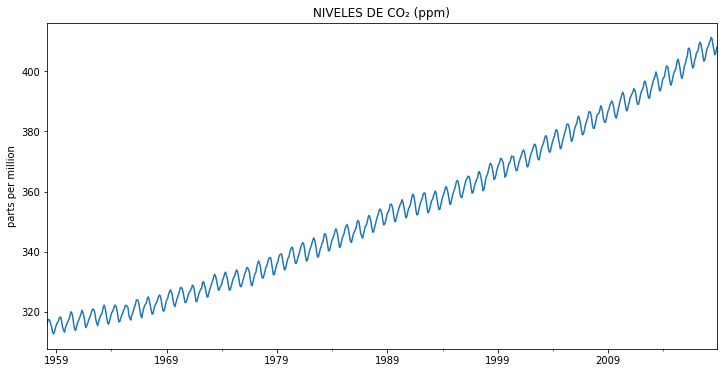

In [5]:
title = 'NIVELES DE CO₂ (ppm)'
ylabel='parts per million'
xlabel='' 

ax = df['interpolated'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### DESCOMPOSICIÓN

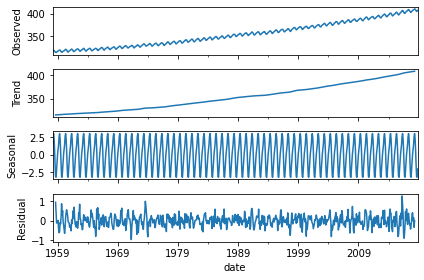

In [6]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

Aunque sea pequeña en comparación con la escala de los datos, hay una estacionalidad anual.

In [7]:
# Prueba
train = df.iloc[:717]
test = df.iloc[717:]

In [ ]:
test.head

<bound method NDFrame.head of             year  month  decimal_date  average  interpolated
date                                                        
2017-12-01  2017     12      2017.958   406.81        406.81
2018-01-01  2018      1      2018.042   407.96        407.96
2018-02-01  2018      2      2018.125   408.32        408.32
2018-03-01  2018      3      2018.208   409.41        409.41
2018-04-01  2018      4      2018.292   410.24        410.24
2018-05-01  2018      5      2018.375   411.24        411.24
2018-06-01  2018      6      2018.458   410.79        410.79
2018-07-01  2018      7      2018.542   408.71        408.71
2018-08-01  2018      8      2018.625   406.99        406.99
2018-09-01  2018      9      2018.708   405.51        405.51
2018-10-01  2018     10      2018.792   406.00        406.00
2018-11-01  2018     11      2018.875   408.02        408.02>

### MODELO SARIMA 

In [8]:
model = SARIMAX(train['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.161
Date:                            Tue, 08 Jun 2021   AIC                            418.323
Time:                                    16:25:47   BIC                            436.617
Sample:                                03-01-1958   HQIC                           425.387
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3720      0.034    -11.055      0.000      -0.438      -0.306
ar.S.L12       0.9996      0.000   3014.029      0.000       0.999       1.000
ma.S.L12      -0.8644      0.023    -37.388      0.000      -0.910      -0.819
sigma2         0.0964      0.005     20.124      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       52.30   Jarque-Bera (JB):                 3.74
Prob(Q):                              0.09   Prob(JB):                         0.15
Heteroskedasticity (H):               1.12   Skew:                            -0.03
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('Predictions')

In [10]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['interpolated'][i]}")

predicted=406.5836023, expected=406.81
predicted=407.7860125, expected=407.96
predicted=408.5310374, expected=408.32
predicted=409.4364151, expected=409.41
predicted=410.9962385, expected=410.24
predicted=411.5998525, expected=411.24
predicted=410.8182534, expected=410.79
predicted=409.126556 , expected=408.71
predicted=407.0258043, expected=406.99
predicted=405.5756865, expected=405.51
predicted=405.8475895, expected=406.0
predicted=407.3827522, expected=408.02


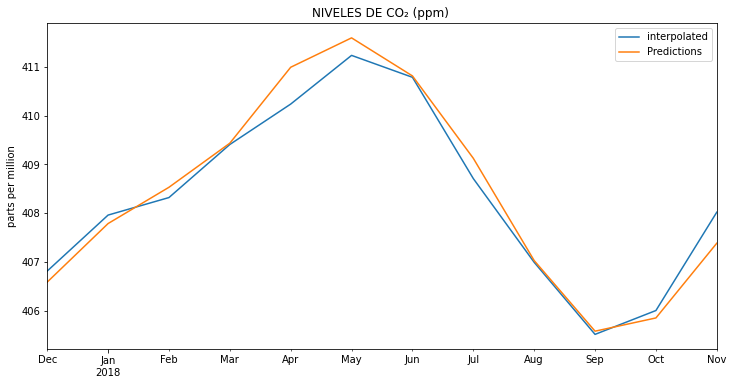

In [11]:
# Plot predictions against known values
title ='NIVELES DE CO₂ (ppm) '
ylabel='parts per million'
xlabel=''

ax = test['interpolated'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### PREDICCIÓN

In [17]:
model = SARIMAX(df['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+36).rename('Forecast')

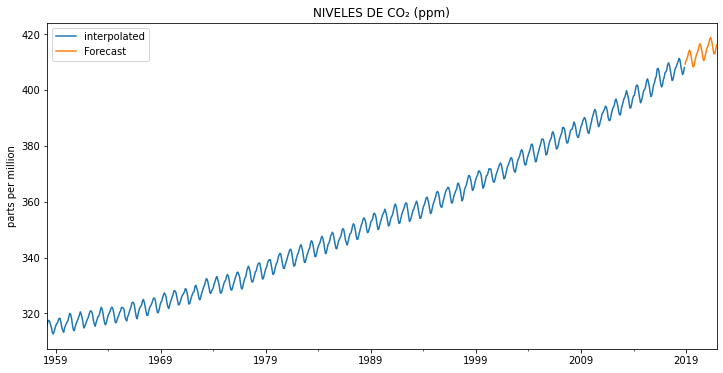

In [18]:
# Plot predictions against known values
title = 'NIVELES DE CO₂ (ppm)'
ylabel='parts per million'
xlabel=''

ax = df['interpolated'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.set(xlabel=xlabel, ylabel=ylabel);